In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [3]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/HMEQ.csv', engine='python')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [7]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [8]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [9]:
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop('BAD', axis=1, inplace=False)

In [10]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

In [11]:
# 분석 모델
model = ['DecisionTree', 'RandomForest', 'GradientBoosting']
# 정확도 저장
train_accuracy = []
test_accuracy =[]
# f1 score 저장
model_f1_score = []
# auc score 저장
model_auc = []

In [12]:
# 분류 모델 실행
# 모델 생성
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

# 예측값
y_pred = dt_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

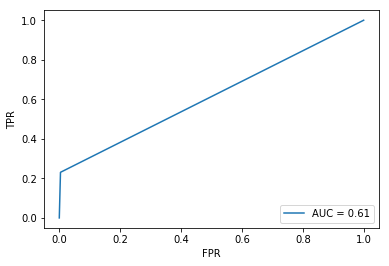

In [13]:
# roc curve 그리기. label에 auc표시
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [14]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

In [15]:
# 랜덤 포레스트
rf_model = RandomForestClassifier(min_samples_leaf=20, max_depth=4, n_estimators=100, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

# 예측값
y_pred = rf_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

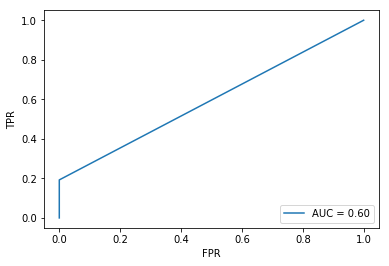

In [16]:
# roc curve 그리기. label에 auc표시
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [17]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

In [18]:
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100, learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

# 예측값
y_pred = gb_final.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

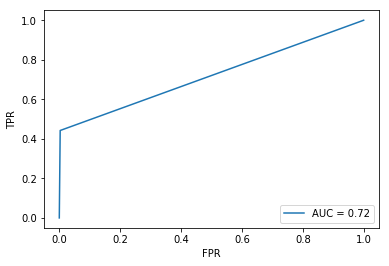

In [19]:
# roc curve 그리기. label에 auc표시
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [20]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

In [21]:
df_eval = pd.DataFrame(index= model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720


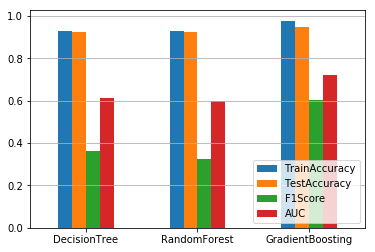

In [22]:
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')

## 실습

In [60]:
df_tele = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/통신고객이탈.csv', engine='python')
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [61]:
df_tele.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [62]:
# 명목형 변수들의 distinct한 값의 수 확인
obj_cols = df_tele.select_dtypes('object').columns
for col in obj_cols:
    _n = len(df_tele[col].value_counts())
    print(col, " : ", str(_n))

CHURN  :  2
CUSTOMER_ID  :  930
GENDER  :  2
CHARGE_TYPE  :  5
HANDSET  :  11
USAGE_BAND  :  6


In [63]:
# CHURN 변수 데이터 전처리
df_tele['CHURN'] = np.where(df_tele['CHURN'] == 'Active', 0, 1)
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [64]:
# get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성
df_tele_dummy = pd.get_dummies(df_tele.drop('CUSTOMER_ID', axis=1, inplace=False))
# 더미변수 생성도니 데이터의 상위 5개 row를 확인
df_tele_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
# 설명변수, 목표변수 나눌것
df_tele_x = df_tele_dummy.drop('CHURN', axis=1, inplace=False)
df_tele_y = df_tele_dummy['CHURN']

# train_test_split
dft_train_x, dft_test_x, dft_train_y, dft_test_y = train_test_split(df_tele_x, df_tele_y, test_size=0.3, random_state=1234)

In [66]:
# 분석 모델
model = ['DecisionTree', 'RandomForest', 'GradientBoosting']
# 정확도 저장
train_accuracy = []
test_accuracy =[]
# f1 score 저장
model_f1_score = []
# auc score 저장
model_auc = []

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
para_depth = [depth for depth in range(1, 11)]
para_split = [n_split * 5 for n_split in range (1, 21)]
para_leaf = [n_leaf * 2 for n_leaf in range (1, 16)]
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]
para_lr = [lr * 0.1 for lr in range(1, 10)]

In [40]:
estimator = DecisionTreeClassifier()

param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split, 'min_samples_leaf' : para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_dt.fit(dft_train_x, dft_train_y)

print("Best estimator model : \n{}".format(grid_dt.best_estimator_))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator model : 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [69]:
# 분류 모델 실행
# 모델 생성
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=20)
dt_model.fit(dft_train_x, dft_train_y)

# train 정확도
train_accuracy.append(dt_model.score(dft_train_x, dft_train_y))
# test 정확도
test_accuracy.append(dt_model.score(dft_test_x, dft_test_y))

# 예측값
y_pred = dt_model.predict(dft_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(dft_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

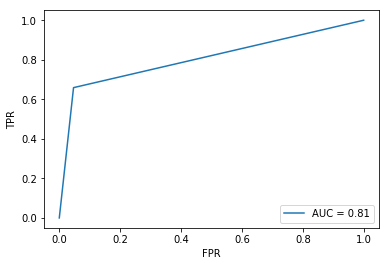

In [42]:
# roc curve 그리기. label에 auc표시
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [70]:
# f1 스코어
model_f1_score.append(f1_score(dft_test_y, y_pred))

In [46]:
estimator = RandomForestClassifier()

param_grid = {'n_estimators' : para_n_tree, 'max_depth' : para_depth, 'min_samples_split' : para_split,
             'min_samples_leaf' : para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_rf.fit(dft_train_x, dft_train_y)
print("best estimator model : \n{}".format(grid_rf.best_estimator_))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [71]:
# 랜덤 포레스트
rf_model = RandomForestClassifier(min_samples_leaf=2, min_samples_split=30,max_depth=10,
                                  n_estimators=70, random_state=1234)
rf_model.fit(dft_train_x, dft_train_y)

# train 정확도
train_accuracy.append(rf_model.score(dft_train_x, dft_train_y))
# test 정확도
test_accuracy.append(rf_model.score(dft_test_x, dft_test_y))

# 예측값
y_pred = rf_model.predict(dft_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(dft_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

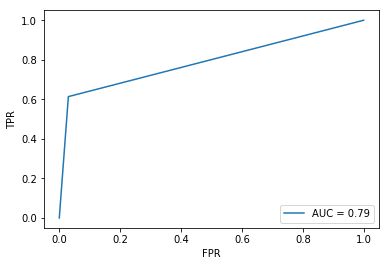

In [72]:
# roc curve 그리기. label에 auc표시
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [73]:
# f1 스코어
model_f1_score.append(f1_score(dft_test_y, y_pred))

In [55]:
estimator = GradientBoostingClassifier()

param_grid = {'learning_rate' : para_lr, 'n_estimators' : para_n_tree, 'max_depth' : para_depth,
              'min_samples_split' : para_split, 'min_samples_leaf' : para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_gb.fit(dft_train_x, dft_train_y)
print("best estimator model : \n{}".format(grid_gb.best_estimator_))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=15,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [74]:
gb_final = GradientBoostingClassifier(min_samples_leaf=4, max_depth=8, n_estimators=20, learning_rate=0.1, random_state=1234)
gb_final.fit(dft_train_x, dft_train_y)

# train 정확도
train_accuracy.append(gb_final.score(dft_train_x, dft_train_y))
# test 정확도
test_accuracy.append(gb_final.score(dft_test_x, dft_test_y))

# 예측값
y_pred = gb_final.predict(dft_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(dft_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

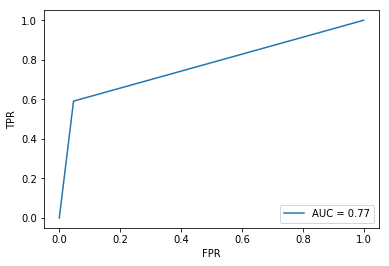

In [75]:
# roc curve 그리기. label에 auc표시
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [76]:
# f1 스코어
model_f1_score.append(f1_score(dft_test_y, y_pred))

In [77]:
df_eval = pd.DataFrame(index= model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.908,0.907,0.690,0.806
RandomForest,0.911,0.914,0.692,0.792
GradientBoosting,0.977,0.896,0.642,0.772


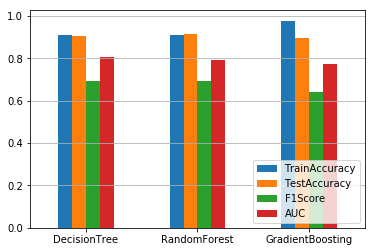

In [78]:
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')